<a href="https://colab.research.google.com/github/Vaibhavpandey1709/Machine_Learning_Internship_Skillwallet_smartinternz/blob/main/Machine_Learning_Approach_for_Employee_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install MultiColumnLabelEncoder

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import MultiColumnLabelEncoder
from sklearn .model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import pickle


In [10]:
data = pd.read_csv('/content/drive/MyDrive/garments_worker_productivity.csv')

In [11]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


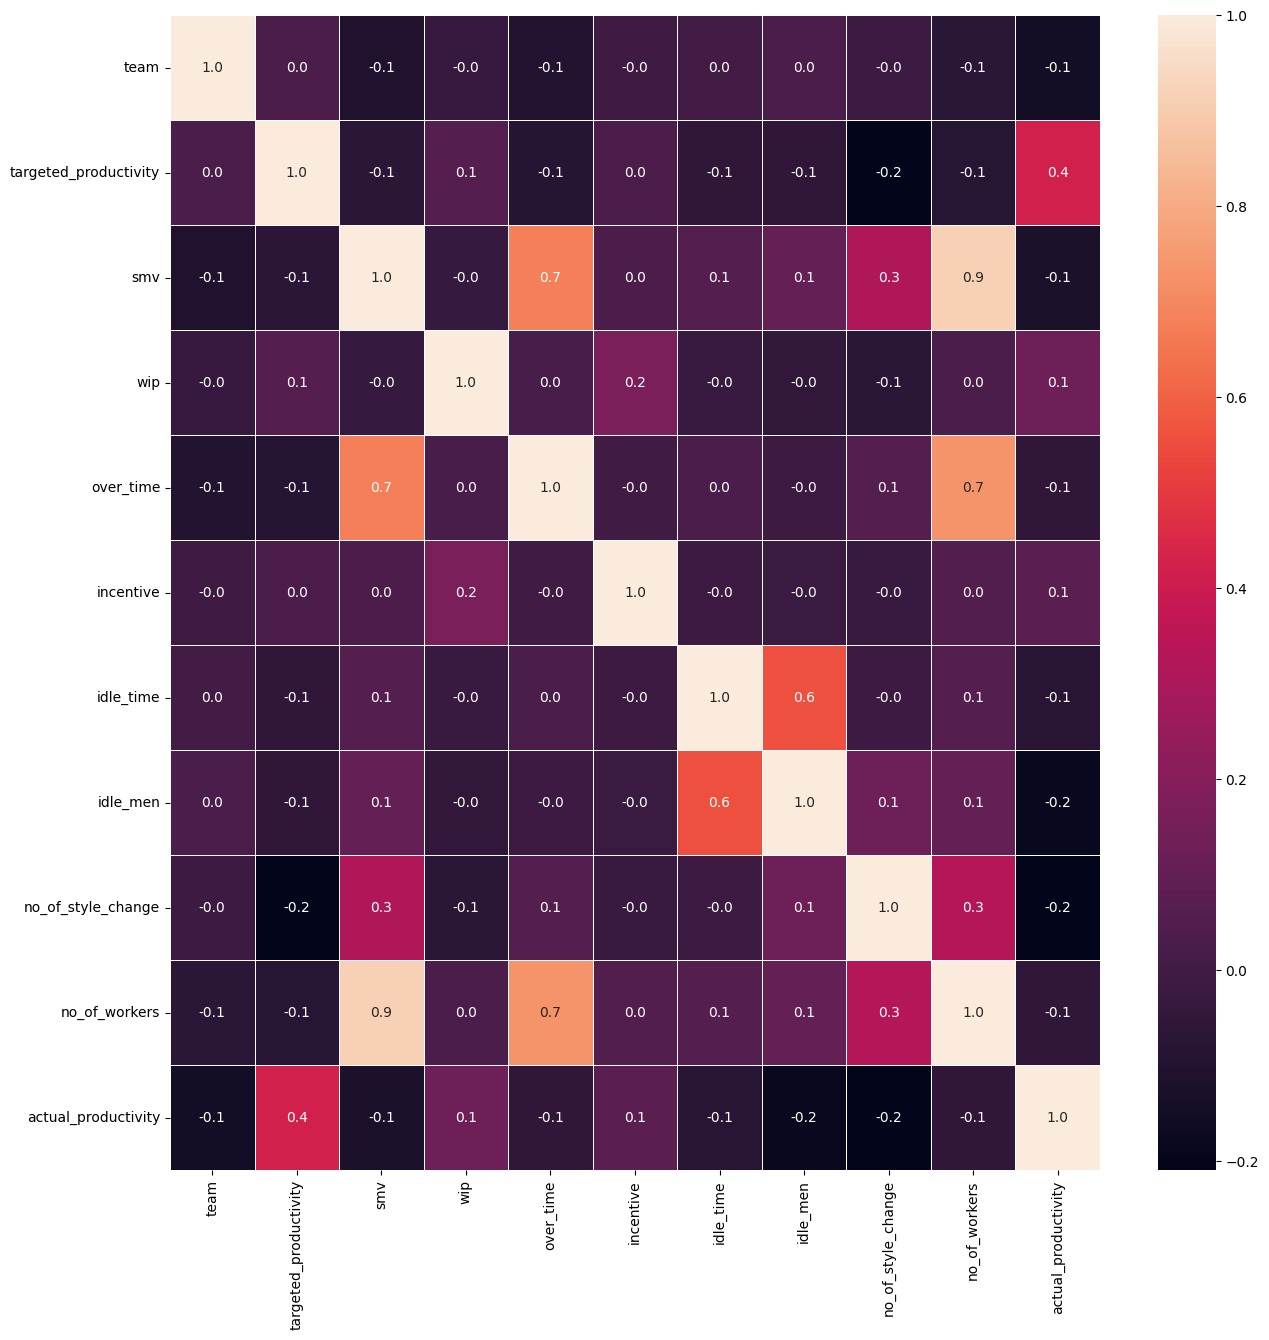

In [12]:
corrMatrix = data.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

In [14]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


**Data preprocessing**

In [16]:
#checking null values
data.shape

(1197, 15)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [18]:
data.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


In [19]:
data.drop(['wip'], axis=1, inplace=True)

In [20]:
#Handling Date & department column
data['date'] = pd.to_datetime(data['date'])

In [21]:
data.date

,date
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01
...,...
1192,2015-03-11
1193,2015-03-11
1194,2015-03-11
1195,2015-03-11


In [22]:
data['month'] = data['date'].dt.month
data.drop(['date'], axis=1, inplace=True)

In [23]:
data.month

,month
0,1
1,1
2,1
3,1
4,1
...,...
1192,3
1193,3
1194,3
1195,3


In [24]:
data['department'].value_counts()

,count
department,
sweing,691
finishing,257
finishing,249


In [25]:
data['department'] = data['department'].apply(lambda x: 'finishing' if x.replace(' ', '') == 'finishing' else 'sewing')

In [26]:
data['department'].value_counts()

,count
department,
sewing,691
finishing,506


In [27]:
#Handling Categorical Values
Mcle = MultiColumnLabelEncoder.MultiColumnLabelEncoder()
data = Mcle.fit_transform(data)

In [28]:
#Splitting data into train and test
x = data.drop(['actual_productivity'], axis=1)
y = data['actual_productivity']

In [29]:
X = x.to_numpy()

In [30]:
X

array([[ 0. ,  0. ,  0. , ...,  0. , 59. ,  1. ],
       [ 0. ,  1. ,  0. , ...,  0. ,  8. ,  1. ],
       [ 0. ,  0. ,  0. , ...,  0. , 30.5,  1. ],
       ...,
       [ 1. ,  1. ,  5. , ...,  0. ,  8. ,  3. ],
       [ 1. ,  1. ,  5. , ...,  0. , 15. ,  3. ],
       [ 1. ,  1. ,  5. , ...,  0. ,  6. ,  3. ]])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(239, 13)
(239,)
(958, 13)
(958,)


**Model Building**

**Linear Regression**

In [35]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [52]:
pred_test = model_lr.predict(X_test)
print("test_MSE:", mean_squared_error(y_test, pred_test))
print("test_MAE:", mean_absolute_error(y_test, pred_test))
print_R2 = r2_score(y_test, pred_test)
print("R2_score:{}".format(r2_score(y_test, pred_test)))

test_MSE: 0.02111568323248259
test_MAE: 0.0999186018230027
R2_score:0.30343409695827495


**Random Forest model**

In [53]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=200, max_depth=5)
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=200)

In [54]:
pred = model_rf.predict(X_test)
print("test_MSE:", mean_squared_error(y_test, pred))
print("test_MAE:", mean_absolute_error(y_test, pred))
print_R2 = r2_score(y_test, pred)
print("R2_score:{}".format(r2_score(y_test, pred)))

test_MSE: 0.020564163515285547
test_MAE: 0.09906803885994737
R2_score:0.3216276749554908


In [43]:
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
pred3 = model_xgb.predict(X_test)

In [56]:
print("test_MSE:", mean_squared_error(y_test, pred3))
print("test_MAE:", mean_absolute_error(y_test, pred3))
print_R2 = r2_score(y_test, pred3)
print("R2_score:{}".format(r2_score(y_test, pred3)))

test_MSE: 0.024043553316892147
test_MAE: 0.10150300556514615
R2_score:0.20684927671441622


compare the model

In [50]:
pred_test = model_lr.predict(X_test)
print("test_MSE:", mean_squared_error(y_test, pred_test))
print("test_MAE:", mean_absolute_error(y_test, pred_test))
print("R2_score:{}".format(r2_score(y_test, pred_test)))

test_MSE: 0.02111568323248259
test_MAE: 0.0999186018230027
R2_score:0.30343409695827495


In [57]:
pred = model_rf.predict(X_test)
print("test_MSE:", mean_squared_error(y_test, pred))
print("test_MAE:", mean_absolute_error(y_test, pred))
print("R2_score:{}".format(r2_score(y_test, pred)))

test_MSE: 0.020564163515285547
test_MAE: 0.09906803885994737
R2_score:0.3216276749554908


In [58]:
pred = model_rf.predict(X_test)
print("test_MSE:", mean_squared_error(y_test, pred))
print("test_MAE:", mean_absolute_error(y_test, pred))
print("R2_score:{}".format(r2_score(y_test, pred)))

test_MSE: 0.020564163515285547
test_MAE: 0.09906803885994737
R2_score:0.3216276749554908


**Evaluating performance of the model and saving the model**

In [59]:
pred3 = model_xgb.predict(X_test)
print("test_MSE:", mean_squared_error(y_test, pred3))
print("test_MAE:", mean_absolute_error(y_test, pred3))
print("R2_score:{}".format(r2_score(y_test, pred3)))

test_MSE: 0.024043553316892147
test_MAE: 0.10150300556514615
R2_score:0.20684927671441622
